In [212]:
import pandas as pd
import json
import requests
from pprint import pprint
import re

In [213]:
url = "https://public.opendatasoft.com/api/records/1.0/search/?dataset=global-shark-attack&q=&rows=1000&facet=date&facet=type&facet=country&facet=area&facet=activity&facet=sex&facet=age&facet=fatal_y_n&facet=time&facet=species"

response = requests.get(url)    # Will get a HTTP Status code (response object)

response_json = response.json()

In [214]:
# Just want to pull records 
records = response_json['records']

# Look at first record
pprint(len(records))

1000


In [215]:
# Need to make a list of the field dictionaries
records_fields = [x["fields"] for x in records]

# Check list to make sure correct info was collected
records_fields[0:1]

[{'activity': 'Surfing',
  'location': 'Jupiter Island, Martin County',
  'sex': 'M',
  'year': '2023',
  'injury': 'Injury to lower leg',
  'case_number': '2023.02.19.a',
  'time': '17h30',
  'name': 'Bert Krebs',
  'investigator_or_source': 'CBS, 2/22/2023',
  'age': '60',
  'date': '2023-02-19',
  'type': 'Unprovoked',
  'area': 'Florida',
  'country': 'USA',
  'fatal_y_n': 'N'}]

In [216]:
# Make a dataframe
df = pd.DataFrame(records_fields)
df.head(5)

,activity,location,sex,year,injury,case_number,time,name,investigator_or_source,age,...,area,country,fatal_y_n,href_formula,original_order,case_number1,species,href,pdf,case_number0
0,Surfing,"Jupiter Island, Martin County",M,2023,Injury to lower leg,2023.02.19.a,17h30,Bert Krebs,"CBS, 2/22/2023",60,...,Florida,USA,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Spearfishing,Ura Estate,M,2023,Questionable,2023.02.19,07h20,Samuela Kiniboi,"Fiji Sun, 2/25/2023",41,...,Taveuni Island,FIJI,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Floating in inflatable pool ring,"Beds, Wylie Bay, Esperance",F,2022,Torso bitten,2022.02.10.R,11h15,Jacquelin Morle,"K. McMurray, TrackingSharks.com",20.0,...,Western Australia,AUSTRALIA,N,http://sharkattackfile.net/spreadsheets/pdf_di...,6734,2022.02.05,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,2022.02.05-Morle.pdf,2022.02.05
3,NaN,Karratha,M,2021,Laceration to foot,2021.04.24.a,15h40,male,"K. McMurray, TrackingSharks.com",NaN,...,Western Australia,AUSTRALIA,N,http://sharkattackfile.net/spreadsheets/pdf_di...,6649,2021.04.19,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.04.19-Karratha.pdf,2021.04.19
4,Surfing,Cacimba do Padre Beach,M,2021,Puncture wounds to right hand,2021.01.22,NaN,Sergo Noronha,"K. McMurray, TrackingSharks.com",52.0,...,Pernambuco,BRAZIL,N,http://sharkattackfile.net/spreadsheets/pdf_di...,6624,2021.01.13.b,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.01.13.b-Noronha.pdf,2021.01.13.b


In [217]:
# Make a cut pd with the fields: ["activity", "location", "sex", "year", "injury", "case_number", "time", "age", "type", "area", "country", "fatal_y_n", "species"]
df_cut = df.loc[:, ["activity", "location", "sex", "year", "injury", "case_number", "time", "age", "type", "area", "country", "fatal_y_n", "species"]]
df_cut.head(5)

,activity,location,sex,year,injury,case_number,time,age,type,area,country,fatal_y_n,species
0,Surfing,"Jupiter Island, Martin County",M,2023,Injury to lower leg,2023.02.19.a,17h30,60,Unprovoked,Florida,USA,N,NaN
1,Spearfishing,Ura Estate,M,2023,Questionable,2023.02.19,07h20,41,Questionable,Taveuni Island,FIJI,N,NaN
2,Floating in inflatable pool ring,"Beds, Wylie Bay, Esperance",F,2022,Torso bitten,2022.02.10.R,11h15,20.0,Unprovoked,Western Australia,AUSTRALIA,N,White shark
3,NaN,Karratha,M,2021,Laceration to foot,2021.04.24.a,15h40,NaN,Unprovoked,Western Australia,AUSTRALIA,N,NaN
4,Surfing,Cacimba do Padre Beach,M,2021,Puncture wounds to right hand,2021.01.22,NaN,52.0,Unprovoked,Pernambuco,BRAZIL,N,NaN


# Pie Chart looking at shark attacks by sex

<AxesSubplot:title={'center':"Sex of 'Victims'"}>

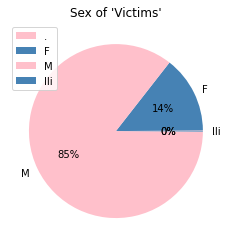

In [218]:
df_sex = df_cut.groupby(["sex"])["sex"].count()
colors = ["pink", "steelblue"]
df_sex.plot(kind="pie", ylabel="", autopct='%1.0f%%', colors=colors, legend=True, title = "Sex of 'Victims'")



# Clean up Species 

In [219]:
# Replace na's with 'unknown'
df_cut["species"].fillna("unknown", inplace=True)
df_cut

,activity,location,sex,year,injury,case_number,time,age,type,area,country,fatal_y_n,species
0,Surfing,"Jupiter Island, Martin County",M,2023,Injury to lower leg,2023.02.19.a,17h30,60,Unprovoked,Florida,USA,N,unknown
1,Spearfishing,Ura Estate,M,2023,Questionable,2023.02.19,07h20,41,Questionable,Taveuni Island,FIJI,N,unknown
2,Floating in inflatable pool ring,"Beds, Wylie Bay, Esperance",F,2022,Torso bitten,2022.02.10.R,11h15,20.0,Unprovoked,Western Australia,AUSTRALIA,N,White shark
3,NaN,Karratha,M,2021,Laceration to foot,2021.04.24.a,15h40,NaN,Unprovoked,Western Australia,AUSTRALIA,N,unknown
4,Surfing,Cacimba do Padre Beach,M,2021,Puncture wounds to right hand,2021.01.22,NaN,52.0,Unprovoked,Pernambuco,BRAZIL,N,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Swimming,"Second Beach, Port St. Johns",M,2012,FATAL,2012.01.18.b,15h40,25,Unprovoked,Eastern Cape Province,SOUTH AFRICA,Y,Thought to involve a bull shark
996,Surfing,"Teahupoo, Tahiti",M,2011,"No injury, board bitten",2011.08.17.b.,15h30,32,Unprovoked,Society Islands,FRENCH POLYNESIA,N,Grey reef shark
997,Playing in the surf,"North Topsail Beach, Onslow County",F,2011,Ankle bitten,2011.06.29,Afternoon,10,Unprovoked,North Carolina,USA,N,"Bull shark, 6'"
998,Wading,"New Smyrna Beach, Volusia County",M,2011,Puncture wound to calf,2011.06.06.R,12h00,19,Unprovoked,Florida,USA,N,3' to 4' shark


In [220]:
# Examine all the possible species
df_cut["species"].unique()

array(['unknown', 'White shark', 'Bull shark pup', 'Cookiecutter shark',
       'Spinner shark', "Tiger shark, 10' to 12'", "Nurse shark, 5'",
       'Nurse shark', 'Spinner shark, 4 to 5 feet', "Nurse shark, 2'",
       'Wobbegong shark', "Bull shark, 8'", 'Lemon shark, 3.5 m',
       '2 m shark', '1m shark', "4' to 6' shark", 'Galapagos shark',
       'Wobbegong, 2m', "4' shark", "Tiger shark, 8'",
       "Porbeagle shark, 7'", 'No shark involvement', '18 to 24 shark',
       "5' shark", 'Shark involvement not confirmed', "6' to 8' shark",
       'Shark involvement prior to death not confirmed', '80 kg shark',
       'Lemon shark', "Tiger shark, 12'", 'Questionable Incident',
       '1.5 m shark', 'White shark, 3m',
       "0.9 m to 1.2 m [3' to 4'] white shark",
       "Tiger shark, 2.4 m to 3 m [8' to 10']",
       "White shark, 4.5 m [14'9]", 'Invalid',
       'Thought to involve a Zambesi shark', "Mako shark, 2 m [6.75']",
       "3' to 4' shark", 'Grey reef shark, 1.5 m',
      

In [221]:
# Clean up data by finding key words and replacing the species information 
# For example, any species that has bull in it will just be replaced with "bull shark"
# any species that has "Great" and "white" will be replaced with "Great white"
# Any species with "Tiger" will be replaced with "Tiger"
# Hammerhead, Mako, Spinner, Nurse, Cookiecutter, Blacktip, Raggedtooth, Zambesi, Grey reef shark, dogfish, wobbegong
# If "or" than species will be replaced with "unknown"
#  

In [222]:
# Function to search for great white buzz words and replace them with "great white" also included C. obscurus (dusky)
def whiteshark(species):
    p = '[Ww]hite'
    if re.search('[Ww]hitetip', species):   # Need to watch out for whitetip species (not great whites)
        return "whitetip"
    elif re.search(p, species):     # great white sharks are just called "white sharks" in much of the world
        return "great white"
    elif re.search('C. obscurus', species):     # Replace species name with common name: dusky
        return 'dusky'
    #elif re.search('?', species) or re.search('\sor\s', species):   # If there is a question mark or an "or" than replace with "unknown"
        #return 'unknown'
    return species  # else just return the species listed for further inspection later


In [223]:
df_cut["species"] = df_cut["species"].apply(whiteshark)
df_cut

,activity,location,sex,year,injury,case_number,time,age,type,area,country,fatal_y_n,species
0,Surfing,"Jupiter Island, Martin County",M,2023,Injury to lower leg,2023.02.19.a,17h30,60,Unprovoked,Florida,USA,N,unknown
1,Spearfishing,Ura Estate,M,2023,Questionable,2023.02.19,07h20,41,Questionable,Taveuni Island,FIJI,N,unknown
2,Floating in inflatable pool ring,"Beds, Wylie Bay, Esperance",F,2022,Torso bitten,2022.02.10.R,11h15,20.0,Unprovoked,Western Australia,AUSTRALIA,N,great white
3,NaN,Karratha,M,2021,Laceration to foot,2021.04.24.a,15h40,NaN,Unprovoked,Western Australia,AUSTRALIA,N,unknown
4,Surfing,Cacimba do Padre Beach,M,2021,Puncture wounds to right hand,2021.01.22,NaN,52.0,Unprovoked,Pernambuco,BRAZIL,N,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Swimming,"Second Beach, Port St. Johns",M,2012,FATAL,2012.01.18.b,15h40,25,Unprovoked,Eastern Cape Province,SOUTH AFRICA,Y,Thought to involve a bull shark
996,Surfing,"Teahupoo, Tahiti",M,2011,"No injury, board bitten",2011.08.17.b.,15h30,32,Unprovoked,Society Islands,FRENCH POLYNESIA,N,Grey reef shark
997,Playing in the surf,"North Topsail Beach, Onslow County",F,2011,Ankle bitten,2011.06.29,Afternoon,10,Unprovoked,North Carolina,USA,N,"Bull shark, 6'"
998,Wading,"New Smyrna Beach, Volusia County",M,2011,Puncture wound to calf,2011.06.06.R,12h00,19,Unprovoked,Florida,USA,N,3' to 4' shark


In [224]:
# The sharks list was created by combing through the species.unique() 
sharks = ['hammerhead', 'mako' 'spinner', 'nurse', 'cookiecutter', 'blacktip', 'raggedtooth', 'zambesi', 'reef', 'dogfish', 'wobbegong', "tiger", "bull", "bronze whaler", "sand", "lemon", "blue", "Port Jackson", "thresher", "shovelnose", "porbeagle", "dusky", "banjo", "silvertip", "whitetip", "dusky", "great white"]

# Function created to check if a species is from the approved list; if it is not, then it is replaced with 'unknown'
def clean_shark_species(species):
    for p in sharks:
        if re.search(p, species) or re.search(p.capitalize(), species):
            return p.lower()
    return "unknown"

In [225]:
# Apply filtering function to the species column 
df_cut["species"] = df_cut["species"].apply(clean_shark_species)
df_cut

,activity,location,sex,year,injury,case_number,time,age,type,area,country,fatal_y_n,species
0,Surfing,"Jupiter Island, Martin County",M,2023,Injury to lower leg,2023.02.19.a,17h30,60,Unprovoked,Florida,USA,N,unknown
1,Spearfishing,Ura Estate,M,2023,Questionable,2023.02.19,07h20,41,Questionable,Taveuni Island,FIJI,N,unknown
2,Floating in inflatable pool ring,"Beds, Wylie Bay, Esperance",F,2022,Torso bitten,2022.02.10.R,11h15,20.0,Unprovoked,Western Australia,AUSTRALIA,N,great white
3,NaN,Karratha,M,2021,Laceration to foot,2021.04.24.a,15h40,NaN,Unprovoked,Western Australia,AUSTRALIA,N,unknown
4,Surfing,Cacimba do Padre Beach,M,2021,Puncture wounds to right hand,2021.01.22,NaN,52.0,Unprovoked,Pernambuco,BRAZIL,N,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Swimming,"Second Beach, Port St. Johns",M,2012,FATAL,2012.01.18.b,15h40,25,Unprovoked,Eastern Cape Province,SOUTH AFRICA,Y,bull
996,Surfing,"Teahupoo, Tahiti",M,2011,"No injury, board bitten",2011.08.17.b.,15h30,32,Unprovoked,Society Islands,FRENCH POLYNESIA,N,reef
997,Playing in the surf,"North Topsail Beach, Onslow County",F,2011,Ankle bitten,2011.06.29,Afternoon,10,Unprovoked,North Carolina,USA,N,bull
998,Wading,"New Smyrna Beach, Volusia County",M,2011,Puncture wound to calf,2011.06.06.R,12h00,19,Unprovoked,Florida,USA,N,unknown


In [226]:
# Check what unique values are now present 
df_cut['species'].unique()

array(['unknown', 'great white', 'bull', 'cookiecutter', 'tiger', 'nurse',
       'wobbegong', 'lemon', 'porbeagle', 'zambesi', 'reef', 'blue',
       'blacktip', 'hammerhead', 'sand', 'bronze whaler', 'whitetip',
       'raggedtooth', 'dogfish', 'silvertip', 'dusky', 'shovelnose'],
      dtype=object)

# Clean up Countries

In [227]:
# Capitalize all countries so theyre the same 
df_cut["country"].str.upper()

0                   USA
1                  FIJI
2             AUSTRALIA
3             AUSTRALIA
4                BRAZIL
             ...       
995        SOUTH AFRICA
996    FRENCH POLYNESIA
997                 USA
998                 USA
999        SOUTH AFRICA
Name: country, Length: 1000, dtype: object

# Clean up activities

In [228]:
df_cut["type"].unique()

array(['Unprovoked', 'Questionable', 'Watercraft', 'Provoked', 'Invalid',
       'Sea Disaster', 'Boat', nan], dtype=object)

### Identify invalid interactions (shark involvement unlikely)

In [229]:
# df_cut[df_cut["type"]=="Watercraft"]
# Watercraft interactions are when people are in boats and interact with sharks
# Eliminating if injury is unrelated to shark damaging someone or a boat
# 15, 28, 79, 123, 158, 644, 645, 674, 676, 679, 872, 902, 960

In [230]:
df_cut[df_cut["type"]=="Questionable"]
# Remove interactions with too little information
# 1, 246

,activity,location,sex,year,injury,case_number,time,age,type,area,country,fatal_y_n,species
1,Spearfishing,Ura Estate,M,2023,Questionable,2023.02.19,07h20,41,Questionable,Taveuni Island,FIJI,N,unknown
246,Kayaking,NaN,M,2019,Partial remains recovered 12/26/2019 from shark,2019.12.21,NaN,70.0,Questionable,NaN,REUNION ISLAND,F,tiger


In [231]:
df_invalid= df_cut[df_cut["type"]=="Invalid"]
# 42, 45, 50, 54, 161, 64, 66, 74, 80, 103, 120, 141, 152, 159, 163, 187, 222, 224, 310, 314, 320, 358, 359, 380, 393, 402, 414, 427, 442, 447, 451, 507, 545, 548, 593, 600, 636, 649, 652, 658, 672, 691, 761, 783, 868, 875, 898, 913, 926,  

df_invalid.to_csv("Resources/type_invalid.csv")

In [232]:
# Checked injury to identify legitimate
#df_cut[df_cut["type"]=="Sea Disaster"]

In [233]:
# Make a list of the rows to drop
# Make a new df with rows not in the drop list
drop_values = [1, 246, 15, 28, 79, 123, 158, 644, 645, 674, 676, 679, 872, 902, 960, 42, 45, 50, 54, 161, 64, 66, 74, 80, 103, 120, 141, 152, 159, 163, 187, 222, 224, 310, 314, 320, 358, 359, 380, 393, 402, 414, 427, 442, 447, 451, 507, 545, 548, 593, 600, 636, 649, 652, 658, 672, 691, 761, 783, 868, 875, 898, 913, 926]
df_real = df_cut[df_cut.index.isin(drop_values) == False]

# Check out number of remaining incidents
len(df_real)

936

## Clean up Fatal question

In [234]:
# Create column to indicate the original index
index_og = df_real.index
len(index_og)

936

In [235]:
df_real = df_real.reset_index()  # make sure indexes pair with number of rows
df_real["index_original"] = index_og

In [236]:
# Need to correct fatal column. It sometimes says "unknown" when in fact the injury describes it as a "FATAL" encountour
fatal = []
for index, row in df_real.iterrows():
   
    fatal_y = ["y", "Y", "T", "t"]  # Inconsistent coding for known fatal interactions
    fatal_n = ["n", "N", "F", "f"]  # Inconsistent codfing for known nonfatal iteractions
    if row["fatal_y_n"] in (fatal_y):
        fatal.append("Y")
    elif re.search("FATAL", str(row["injury"])):
        fatal.append("Y")   # "Y" will be code for yes
    elif row["fatal_y_n"] in fatal_n:
        fatal.append("N")   # "N" will be code for no
    else:
        fatal.append("U")   # "U" will stand for unknown
    
print(len(fatal))

936


In [237]:
# Set list of fatal codes as the new fatal_y_n column
df_real["fatal_y_n"] = fatal
df_real.head()

,index,activity,location,sex,year,injury,case_number,time,age,type,area,country,fatal_y_n,species,index_original
0,0,Surfing,"Jupiter Island, Martin County",M,2023,Injury to lower leg,2023.02.19.a,17h30,60,Unprovoked,Florida,USA,N,unknown,0
1,2,Floating in inflatable pool ring,"Beds, Wylie Bay, Esperance",F,2022,Torso bitten,2022.02.10.R,11h15,20.0,Unprovoked,Western Australia,AUSTRALIA,N,great white,2
2,3,NaN,Karratha,M,2021,Laceration to foot,2021.04.24.a,15h40,NaN,Unprovoked,Western Australia,AUSTRALIA,N,unknown,3
3,4,Surfing,Cacimba do Padre Beach,M,2021,Puncture wounds to right hand,2021.01.22,NaN,52.0,Unprovoked,Pernambuco,BRAZIL,N,unknown,4
4,5,Surfing,"New Smyrna Beach, Volusia County",M,2019,3 lacerations to left hand,2019.07.29.b,13h30,18.0,Unprovoked,Florida,USA,N,unknown,5


## Clean up Time

In [238]:
def simplify_time(col):
    cleaned_times=[]
    for t in col: 
        if pd.isna(t):
            cleaned_times.append("Unknown")

        else:
            phrases = ["Morning", "Afternoon", "Midday", "Evening", "Night", "Early Morning", "Early morning", "Lunchtime", "Late afternoon", "Mid morning"]
            if re.search("[0-9]+h+[0-9]", t):
                pieces = t.split("h")
                if len(pieces) > 2:
                    print(t)
                if "Between" in pieces:
                    print(t)
            elif t not in phrases:
                print(t)

In [239]:
simplify_time(df_real["time"])


2 hours after Opperman
FATAL  (Wire netting installed at local beaches after this incident.)
0830
--
Dusk
14h00 - 15h00
06h00 -- 07h00
19h00-20h00
Nightfall
19h00 / 20h00
Early afternoon
Between 11h00 & 12h00
Before daybreak
14h00  -15h00
P.M.
Dark
07h00 - 08h00


In [240]:
def clean_time(t):
    morning = ["morning", "Morning", "dawn", "Dawn", "Early morning", "Early Morning", "Before daybreak", "06h00 -- 07h00", "07h00 - 08h00", "0830", "<07h30", "Before 10h00"]
    evening = ["evening", "dusk", "Dusk", "Evening", "19h00-20h00", "19h00 / 20h00"]
    night = ["Dark", "Nightfall"]
    midday = ["Between 11h00 & 12h00", "Midday", "midday"]
    afternoon = ["14h00 - 15h00", "Early afternoon", "14h00 - 15h00", "14h00  -15h00"]
    if pd.isna(t):
        return "Unknown"
    
    if t in morning:
        return "Morning"
    elif t in evening:
        return "Evening"
    elif t in night:
        return "Night"
    elif t in midday:
        return "Midday"
    elif t in afternoon:
        return "Afternoon"
    if re.search("[0-9]+h+[0-9]",t):
        h,m = t.split("h")
        t_clean = int(h)*60 + int(m)
        if t_clean <= 240 or t_clean > 1260:
            return "Night"
        elif t_clean <=720:
            return "Morning"
        elif t_clean <= 1020:
            return "Afternoon"
        else:
            return "Evening"
    return "Unknown"

In [241]:
df_real["time"] = df_real["time"].apply(lambda x: clean_time(str(x)))
df_real

,index,activity,location,sex,year,injury,case_number,time,age,type,area,country,fatal_y_n,species,index_original
0,0,Surfing,"Jupiter Island, Martin County",M,2023,Injury to lower leg,2023.02.19.a,Evening,60,Unprovoked,Florida,USA,N,unknown,0
1,2,Floating in inflatable pool ring,"Beds, Wylie Bay, Esperance",F,2022,Torso bitten,2022.02.10.R,Morning,20.0,Unprovoked,Western Australia,AUSTRALIA,N,great white,2
2,3,NaN,Karratha,M,2021,Laceration to foot,2021.04.24.a,Afternoon,NaN,Unprovoked,Western Australia,AUSTRALIA,N,unknown,3
3,4,Surfing,Cacimba do Padre Beach,M,2021,Puncture wounds to right hand,2021.01.22,Unknown,52.0,Unprovoked,Pernambuco,BRAZIL,N,unknown,4
4,5,Surfing,"New Smyrna Beach, Volusia County",M,2019,3 lacerations to left hand,2019.07.29.b,Afternoon,18.0,Unprovoked,Florida,USA,N,unknown,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,995,Swimming,"Second Beach, Port St. Johns",M,2012,FATAL,2012.01.18.b,Afternoon,25,Unprovoked,Eastern Cape Province,SOUTH AFRICA,Y,bull,995
932,996,Surfing,"Teahupoo, Tahiti",M,2011,"No injury, board bitten",2011.08.17.b.,Afternoon,32,Unprovoked,Society Islands,FRENCH POLYNESIA,N,reef,996
933,997,Playing in the surf,"North Topsail Beach, Onslow County",F,2011,Ankle bitten,2011.06.29,Unknown,10,Unprovoked,North Carolina,USA,N,bull,997
934,998,Wading,"New Smyrna Beach, Volusia County",M,2011,Puncture wound to calf,2011.06.06.R,Morning,19,Unprovoked,Florida,USA,N,unknown,998


## Split up the case number to get the exact date

In [242]:
from datetime import datetime

In [243]:
for t in df_real["case_number"]:
    s = t.split(".")
    if pd.isna(t):  # Check for nan
        print("ah")
    if len(s[0]) != 4:
        print(t)
    elif len(s[1]) != 2:
        print(t)
    elif len(s[2]) != 2:
        print (t) 
    

1988.04.15a
1951.09.02-R
518.04.00.R
ND-0124
ND.0017
ND.0014
ND.0006
2023.02,04
336BC
ND-0149
ND-0109
ND.0091
ND.0062
ND.0022
ND.0018
ND.0010
ND.0005
ND-0135
ND-0127
ND.0094
ND.0051
ND.0049
ND.0042
ND.0034
ND.0024
ND-0133
ND-0113
ND.0104
ND.0085
ND.0082
ND.0081
ND.0078
ND.0043
ND.0013
ND.0003


In [244]:
def grab_date(n):
    l = n.split(".")
    date = f"{l[1]}/{l[2]}/{l[0]}"
    return datetime.strptime(date, "%m/%d/%y").date()

In [245]:
df_real["date"] = df_real["case_number"].apply(lambda x: grab_date(x))
df_real

ValueError: unconverted data remains: 23

## Clean up the sex

In [246]:
df_real["sex"].unique()

array(['M', 'F', nan, 'lli', '.'], dtype=object)

In [247]:
def clean_sex(item):
    if pd.isna(item):
        return "Unknown"
    elif item not in ["M", "F"]:
        return "Unknown"
    return item

In [210]:
df_real["sex"] = df_real["sex"].apply(lambda x: clean_sex(x))

# Export! 

In [211]:
df_real.to_csv("Resources/shark_clean.csv")